<a href="https://colab.research.google.com/github/mgfrantz/CTME-llm-lecture-resources/blob/main/prototyping_ai/01_getting_started_with_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making our first LLM API call



## Setup

In [1]:
!pip install -Uqqqq openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 15.9 MB/s eta 0:00:00


In [2]:
# Imports
from rich import print

## Setting our `OPENAI_API_KEY` environment variable

When we use any LLM provider like OpenAI, Anthropic, or Google, we need some way to tell them who we are making the request.
Today, we'll be using OpenAI.
The most straightforward way to provide this key is through the environment variable `OPENAI_API_KEY`.
The OpenAI python client looks for this environment variable to use in authentication.

In the cell below, we load it from the Google Colab secrets manager on the left 👈.
Before runnign this code, make sure your API key is set as shown below:

![](https://github.com/mgfrantz/CTME-llm-lecture-resources/blob/main/images/colabSecrets.png?raw=true)

In [3]:
# Set the OPENAI_API_KEY environment variable
from google.colab import userdata # import the environment variables from secrets
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY') # Set the OPENAI_API_KEY environmnet variable

## Under the hood: `curl`

Almost all of the interactions we will have with LLMs are through API calls.
Below is one of the most low-level ways we can call an LLM, using the `curl` command.
This command gives us a lot of information about how the API request is structured.
We pass a JSON with an authorization header containing our `OPENAI_API_KEY`.
We also pass the model we want to call, the chat messages, and hyperparameters such as `temperature` that help control how text is generated.

In [4]:
# Make the API call to OpenAI and store the response in test.json
!curl https://api.openai.com/v1/chat/completions \
  -H "Content-Type: application/json" \
  -H "Authorization: Bearer $OPENAI_API_KEY" \
  -d '{ \
     "model": "gpt-4o-mini", \
     "messages": [{"role": "user", "content": "Say: This is a test!"}], \
     "temperature": 0.7 \
    }' > test.json
# Show the output of test.json formatted nicely
!cat test.json | python -m json.tool

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   765  100   136    736    130  0:00:01  0:00:01 --:--:--   868
{
    "id": "chatcmpl-AR5Xfe2ByVqhgkp2vOmMmn7cFySE3",
    "object": "chat.completion",
    "created": 1731019523,
    "model": "gpt-4o-mini-2024-07-18",
    "choices": [
        {
            "index": 0,
            "message": {
                "role": "assistant",
                "content": "This is a test!",
                "refusal": null
            },
            "logprobs": null,
            "finish_reason": "stop"
        }
    ],
    "usage": {
        "prompt_tokens": 14,
        "completion_tokens": 5,
        "total_tokens": 19,
        "prompt_tokens_details": {
            "cached_tokens": 0,
            "audio_tokens": 0
        },
        "completion_tokens_details": {
            "reasoning_tokens": 0,
            "audio_tokens": 0,
    

## Using the OpenAI Python client

While the `curl` command shows us how the API call is made, it's not something that we can easily use in more complex applications.
One thing we can use is the OpenAI python client.
We can do the exact same thing, but the API call is a bit more abstracted from the developer.
Let's see how to perform the exact same API call using the OpenAI clinet 👇:

In [5]:
from openai import OpenAI # import OpenAI
client = OpenAI() # Create the OpenAI client

In [6]:
# Create the messages (same as above)
messages = [
    {"role": "user", "content": "Say: This is a test!"},
]

# Make the API call
chat_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    # stream=True
)

In [9]:
# Display the output
print(chat_completion)

ChatCompletion(
    id='chatcmpl-AR5XhXKrhcOjmSEAddvKCcA6iFmaS',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content='This is a test!',
                refusal=None,
                role='assistant',
                audio=None,
                function_call=None,
                tool_calls=None
            )
        )
    ],
    created=1731019525,
    model='gpt-4o-mini-2024-07-18',
    object='chat.completion',
    service_tier=None,
    system_fingerprint='fp_0ba0d124f1',
    usage=CompletionUsage(
        completion_tokens=5,
        prompt_tokens=14,
        total_tokens=19,
        completion_tokens_details=CompletionTokensDetails(
            accepted_prediction_tokens=0,
            audio_tokens=0,
            reasoning_tokens=0,
            rejected_prediction_tokens=0
        ),
        prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
    )
)

# Build our first chatbots

In this section, we'll go through several demos.
By the end of this section, you should be able to:
- Build a basic chatbot with the popular `gradio` Python library
- Understand key hyperparameters like `temperature`, `top_p`, and `top_k`
- Build an advanced chatbot with hyperparameter controls

## Exercise: Building a basic chatbot with `gradio`

User interfaces (UIs) are a great way to demo work in AI.
In the next several lessons, we will be using the `gradio` framework to demonstrate our growing skillset.
In this exercise, we will get a gentle introduction to creating chatbots with `gradio`.

Please follow the [ChatInterface](https://www.gradio.app/docs/gradio/chatinterface) documentation and the [Creating a chatbot fast](https://www.gradio.app/guides/creating-a-chatbot-fast) guide to make your first AI chatbot.
Your chatbot must:
- respond to messages

If this too easy, try to:
- add a system prompt
- use `stream=True` in your chat function

In [10]:
!pip install -Uqqqq gradio gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00


In [11]:
import gradio as gr

In [12]:
def chat(message, history):
    if not history:
        history = [
            {"role": "system", "content": "You are a helpful assistant who speaks like a pirate."},
        ]
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=history,
        stream=True,
    )
    partial_message = ""
    for chunk in response:
        if chunk.choices[0].delta.content is not None:
              partial_message = partial_message + chunk.choices[0].delta.content
              yield partial_message

In [13]:
gr.ChatInterface(chat, type='messages').launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af0474a55a92d45038.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Text generation hyperparameters

There are several hyperparameters we can play with that determine how text is generated.
For each token, the model outputs a score distribution over words, and that distribution is normalized using the softmax function to sum to 1.0.
We have several options to modify this probability distribution in ways that affect the way text is generated.

### `temperature`

The softmax function is shown below:

$$
\text{softmax}(p) = \frac{e^{x_i}}{\sum_{j=0}^ne^{x_j}}
$$

The softmax function is defined in python below:


In [14]:
import numpy as np

def softmax(p):
    return np.exp(p) / np.sum(np.exp(p))

# Example usage
p = np.array([1, 2, 3, 4, 5])
print(softmax(p))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]

The `temperature` paramater allows us to make the most probable words more probable (temperature < 1) or less probable (temperature > 1) than vanilla softmax (temperature = 1).
The formula for softmax with temperature is show below:

$$
\text{softmax}(p, T) = \frac{e^{\frac{x_i}{T}}}{\sum_{j=0}^ne^{\frac{x_j}{T}}}
$$

All you do is divide everything by T before taking the exponent; larger values of $T$ flatten the distribution, while smaller values of $T$ skew the distribution towards the most probable tokens.

### Demo: Softmax with temperature

In [15]:
# Softmax function with temperature parameter
def softmax_with_temperature(probs, temperature):
    exp_probs = np.exp(np.log(probs) / temperature)
    return exp_probs / np.sum(exp_probs)

In [16]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Define a small probability distribution
probs = np.array([0.5, 0.3, 0.1, 0.05, 0.05])

# Plot the distribution with numbers on top of each bar
def plot_distribution(temperature):
    adjusted_probs = softmax_with_temperature(probs, temperature)
    plt.figure(figsize=(6, 4))
    bars = plt.bar(range(len(probs)), adjusted_probs, tick_label=['A', 'B', 'C', 'D', 'E'])
    plt.ylim(0, 1)
    plt.title(f'Softmax with Temperature = {temperature:.2f}')
    plt.ylabel('Probability')
    plt.xlabel('Tokens')

    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()

# Interactive widget
interact(plot_distribution, temperature=(0.1, 2.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='temperature', max=2.0, min=0.1), Output()), _dom_cla…

### Demo: Alter the `temperature` parameter

In this demo, we generate several messages from the same prompt.
If we lower the temperature to 0, what do you notice about the results?
What if we raise it above 1.0?

In [17]:
messages = [
    {"role": "user", "content": "Write a python function that reverses as tring. Tell a joke in the docstring!"},
]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=1.0, # change this number between 0 and 2 to see the outcome
    n=3 # generate 3 choices
)

In [18]:
for choice in response.choices:
    print(choice.message.content)
    print('\n\n' + '='*50 + '\n')

Sure! Here's a Python function that reverses a string, along with a joke in the docstring:

```python
def reverse_string(s):
    """
    This function takes a string and returns it reversed.
    
    Why did the scarecrow win an award?
    Because he was outstanding in his field!
    """
    return s[::-1]

# Example usage
if __name__ == "__main__":
    original_string = "Hello, World!"
    reversed_string = reverse_string(original_string)
    print(reversed_string)  # Output: !dlroW ,olleH
```

Feel free to use this function in your code!

==================================================

Here's a Python function that reverses a string, along with a joke in the docstring:

```python
def reverse_string(s):
    """
    Reverses the given string.

    Why did the programmer quit his job?
    Because he didn't get arrays!
    """
    return s[::-1]

# Example usage:
reversed_string = reverse_string("Hello, World!")
print(reversed_string)  # Output: !dlroW ,olleH
```

This function uses Python's slicing feature to reverse the string efficiently. The joke in the docstring adds a bit
of humor to the explanation!

==================================================

Sure! Here’s a Python function that reverses a string, along with a joke in the docstring:

```python
def reverse_string(s):
    """
    Reverses the given string.

    Why do programmers prefer dark mode?
    Because light attracts bugs!

    Parameters:
    s (str): The string to be reversed.

    Returns:
    str: The reversed string.
    """
    return s[::-1]
```

You can use this function by passing a string to it:

```python
print(reverse_string("Hello, World!"))
```

This will output:

```
!dlroW ,olleH
```

==================================================

### Demo: `top_k`

In top k sampling, we define the number of tokens we want to consider to sample from.
For example if `top_k = 3`, we will take the scores of the top 3 tokens and apply the softmax to only those 3 scores.
Run the code block below to see how `top_k` normalizes the scores at different values.

In [19]:
# Define a small probability distribution
probs = np.array([0.5, 0.3, 0.1, 0.05, 0.05])

# Plot the distribution with numbers on top of each bar
def plot_top_k(top_k):
    ticks = ['A', 'B', 'C', 'D', 'E']
    sorted_probs = np.sort(probs)[::-1]
    top_k_probs = sorted_probs[:top_k]
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    adjusted_probs = softmax(probs)
    ax = axes[0]
    bars = ax.bar(range(len(probs)), adjusted_probs, tick_label=ticks)
    ax.set_ylim(0, 1)
    ax.set_title('Original Probabilities')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Token')

    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    ax = axes[1]
    if top_k < len(probs):
        updated_probs = softmax(probs[:top_k])
        bars = ax.bar(range(top_k), updated_probs, tick_label=ticks[:top_k])
    else:
        bars = ax.bar(range(len(probs)), softmax(probs), tick_label=ticks)
    ax.set_ylim(0, 1)
    ax.set_title(f'Top {top_k} Probabilities')
    ax.set_ylabel('Probability')
    ax.set_xlabel('Token')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()

# Interactive widget
interact(plot_top_k, top_k=(1, len(probs), 1));

interactive(children=(IntSlider(value=3, description='top_k', max=5, min=1), Output()), _dom_classes=('widget-…

### Demo: `top_p` (aka nucleus sampling)

`top_p` is similar to `top_k`, but instead of defining the number of tokens to consider, you define a cutoff for cumulative probability.
For example, if you have a top_p of 0.6 and score of ('cat', 0.4), ('dog', 0.15), ('llama', 0.1), and ('parakeet', 0.01), you would cut only consider 'cat', 'dog', and 'llama' because 0.4 + 0.15 is less than 0.6, but 0.4 + 0.15 + 0.1 is greater.
Because you have a probability cutoff instead of number of tokens, this may mean you have different numbers of tokens considered at each decoding step.

Play around with the `top_p` slider below 👇 to get some intuition for how it works.

In [20]:
# Define a small probability distribution (can simulate a language model's logits)
probs = np.array([0.4, 0.2, 0.15, 0.1, 0.08, 0.05, 0.02])

# Function to apply top-p filtering with a minimum of one token selected
def top_p_filter(probs, p):
    sorted_probs = np.sort(probs)[::-1]
    cumulative_probs = np.cumsum(sorted_probs)

    # Ensure at least one token is selected
    if p < sorted_probs[0]:
        cutoff = 1
    else:
        cutoff = np.argmax(cumulative_probs >= p) + 1

    filtered_probs = sorted_probs[:cutoff]
    return filtered_probs, cutoff

# Plot the distribution with top-p filtering
def plot_top_p(p):
    filtered_probs, cutoff = top_p_filter(probs, p)
    normalized_probs = filtered_probs / np.sum(filtered_probs)  # Normalize the selected probabilities

    # Create two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

    # Plot 1: Original distribution with top-p filtering
    bars1 = axs[0].bar(range(len(probs)), np.sort(probs)[::-1], tick_label=labels)
    axs[0].set_ylim(0, 1)
    axs[0].set_title(f'Top-p Sampling (p = {p:.2f}) - Original Probabilities')
    axs[0].set_ylabel('Probability')
    axs[0].set_xlabel('Tokens')

    # Highlight selected and unselected probabilities
    for i, bar in enumerate(bars1):
        if i >= cutoff:
            bar.set_color('gray')  # Color the bars outside top-p as gray
        else:
            bar.set_color('blue')  # Highlight the selected probabilities

    # Add numbers on top of each bar for original distribution
    for bar in bars1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    # Plot 2: Normalized probabilities of the selected tokens
    bars2 = axs[1].bar(range(len(filtered_probs)), normalized_probs, tick_label=labels[:len(filtered_probs)])
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f'Normalized Probabilities of Selected Tokens (p = {p:.2f})')
    axs[1].set_ylabel('Normalized Probability')
    axs[1].set_xlabel('Selected Tokens')

    # Add numbers on top of each bar for normalized probabilities
    for bar in bars2:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Interactive widget
interact(plot_top_p, p=(0.01, 1.0, 0.05));

interactive(children=(FloatSlider(value=0.46, description='p', max=1.0, min=0.01, step=0.05), Output()), _dom_…

## Exercise: Advanced chatbot with hyperparameter controls

Now that you've learned about roles and generation hyperparameters, let's create a new chatbot that allows you to contol at them.
Your chatbot must:
- allow for control of at least 1 generation hyperparameter (ex: `temperature`)
- allow for user input of a system message

If this is too easy, try to:
- allow for control over `temperature` and `top_p`
- improve the UI by putting all the controls in a sidebar
- have a `Clear` button that restarts the conversation
- add documentation with markdown
- implement streaming responses

In [21]:
def user(message:str, history:list, system_message:str):
    if not history and system_message:
        history.append(
            {"role": "system", "content": system_message},
        )
    # Append the user's message to the conversation history
    history.append({"role": "user", "content": message})
    return "", history

def bot(history, temperature, top_p):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=history,
        temperature=temperature,
        top_p=top_p,
        stream=True,
    )
    history.append({"role": "assistant", "content": ""})
    for chunk in response:
        if chunk.choices[0].delta.content is not None:
              history[-1]['content'] += chunk.choices[0].delta.content
              yield history

def clear():
    return "", []

In [22]:
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column(scale=1):
            temperature = gr.Slider(minimum=0, maximum=1, value=0.7, label="Temperature")
            top_p = gr.Slider(minimum=0, maximum=1, value=1, label="Top p")
            system_message = gr.Textbox(label="System message", value="You are a helpful assistant who speaks like a pirate.")
            clear_button = gr.Button("Clear messages")
        with gr.Column(scale=3):
            chatbot = gr.Chatbot(type='messages')
            input = gr.Textbox(label="Message", value="")
            input.submit(user, [input, chatbot, system_message], [input, chatbot]).then(
                bot, [chatbot, temperature, top_p], chatbot
            )
            clear_button.click(clear, [], [input, chatbot])

demo.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://944325f63036d61359.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Prompt engineering 1: zero-shot prompting

To really benchmark how each of these techniques do, we need a baseline.
We will use zero-shot prompting to get a base level of performance on our task.

So far, we've been using the low-level `openai` library.
However, there are several very competent higher-level libraries that provide great abstractions such as `langchain` and `llama-index`.
Today, we'll be using `llama-index` to make our LLM calls a bit easier.

In [24]:
!pip install -qqqq datasets llama-index llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not curre

## Prepare our dataset

In [25]:
from datasets import load_dataset

def add_rating(example):
    example["label"] = example["prediction"][0]["label"]
    return example

# Load the dataset from huggingface
ds = load_dataset("argilla/uber-reviews")['train']
# Parse the data to just the text and the label
ds = ds.map(add_rating).select_columns(['text', 'label'])
# Split the data into train, valid, and test
valid_size = test_size = int(0.1 * len(ds))
ds = ds.train_test_split(test_size=test_size)
train = ds['train']
test = ds['test']
ds = train.train_test_split(test_size=valid_size)
train = ds['train']
valid = ds['test']

print(len(train), len(valid), len(test))

README.md:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

(…)-00000-of-00001-ada007d4eb4ddc62.parquet:   0%|          | 0.00/1.69M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2347 [00:00<?, ? examples/s]

Map:   0%|          | 0/2347 [00:00<?, ? examples/s]

1879 234 234

In [26]:
train.to_pandas().head(3)

,text,label
0,I've been driving for Uber for a while now and...,1
1,When Uber runs over its customers. Buyer betw...,1
2,I schedule two Ubers for a trip to the airport...,1


## Zero-shot prompt

In [27]:
from llama_index.core.schema import TextNode
from llama_index.core import PromptTemplate
from llama_index.core.prompts import ChatMessage
from llama_index.llms.openai import OpenAI
from pydantic import BaseModel, Field
from IPython.display import display
import asyncio

In [29]:
prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the context information and not prior knowledge, \
please attempt to predict the review score of the context.

Query: What is the rating of this review?
Answer: \
"""

prompt_tmpl = PromptTemplate(
    prompt_tmpl_str,
)

In [30]:
class Rating(BaseModel):
    rating: int = Field(..., description="Rating of the review", enum=[1, 2, 3, 4, 5])

llm = OpenAI(model="gpt-4o-mini")
zero_shot_structured_llm = llm.as_structured_llm(Rating)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

async def predict_and_evaluate(predict_fn):
    labels = [int(x) for x in valid['label']]
    tasks = [
        predict_fn(text)
        for text in valid['text']
    ]
    predictions = await asyncio.gather(*tasks)
    cm = ConfusionMatrixDisplay.from_predictions(labels, predictions, normalize='true')
    cr = classification_report(labels, predictions)
    return labels, predictions, cm, cr

In [19]:
async def zero_shot_predict(text):
    messages = [
        ChatMessage.from_str(prompt_tmpl.format(review=text))
    ]
    response = await zero_shot_structured_llm.achat(messages)
    return response.raw.rating

precision    recall  f1-score   support

           1       0.94      0.90      0.92       179
           2       0.21      0.45      0.29        11
           3       0.50      0.30      0.38        10
           4       0.43      0.75      0.55         8
           5       0.89      0.65      0.76        26

    accuracy                           0.82       234
   macro avg       0.59      0.61      0.58       234
weighted avg       0.87      0.82      0.84       234

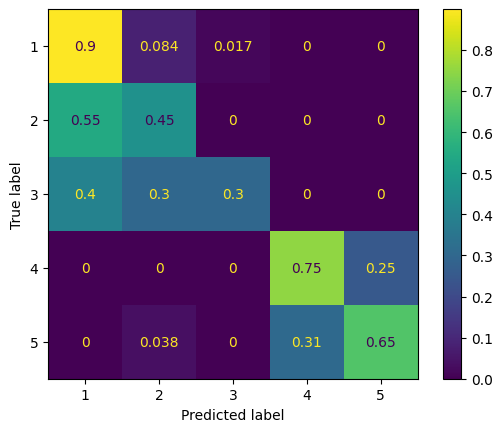

In [22]:
zero_shot_labels, zero_shot_predictions, zero_shot_cm, zero_shot_cr = await predict_and_evaluate(zero_shot_predict)
print(zero_shot_cr)

# Prompt engineering 2: zero-shot chain-of-thought (CoT) prompting

In [32]:
class RatingWithRationale(BaseModel):
    rationale: str = Field(..., description="Brief for the rating")
    rating: int = Field(..., description="Rating of the review", enum=[1, 2, 3, 4, 5])

llm = OpenAI(model="gpt-4o-mini")
zero_shot_cot_structured_llm = llm.as_structured_llm(RatingWithRationale)

In [33]:
cot_prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the context information and not prior knowledge, \
please attempt to analyze the text and provide rationale as to \
why it might be a good or bad review. \
Then, finally predict the rating associated with the review.

Let's think step by step: \
"""

cot_prompt_tmpl = PromptTemplate(
    cot_prompt_tmpl_str,
)

In [34]:
async def zero_shot_cot_predict(text):
    messages = [
        ChatMessage.from_str(cot_prompt_tmpl.format(review=text))
    ]
    response = await zero_shot_cot_structured_llm.achat(messages)
    return response.raw.rating

precision    recall  f1-score   support

           1       0.92      0.87      0.90       182
           2       0.23      0.37      0.29        19
           3       0.33      0.12      0.18         8
           4       0.33      0.50      0.40         6
           5       0.84      0.84      0.84        19

    accuracy                           0.79       234
   macro avg       0.53      0.54      0.52       234
weighted avg       0.82      0.79      0.80       234

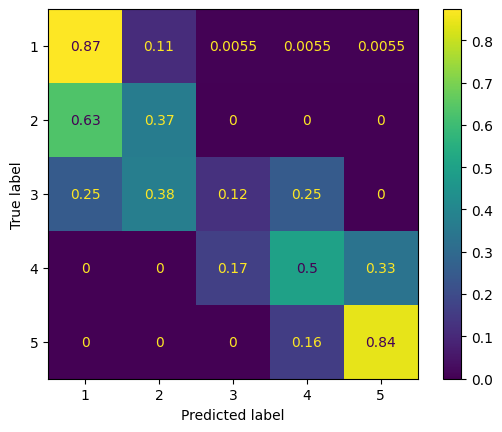

In [35]:
zero_shot_cot_labels, zero_shot_cot_predictions, zero_shot_cot_cm, zero_shot_cot_cr = await predict_and_evaluate(zero_shot_cot_predict)
print(zero_shot_cot_cr)

# Prompt engineering 3: few-shot promting

In the following cell, we load and parse the data.
The data here is uber reviews

In [36]:
train_nodes = [
    TextNode(
        text=row['text'],
        metadata={
            "rating": row['label'],
        }
    )
    for row in ds['train']
]

In [37]:
def random_few_shot_examples_fn(**kwargs):
    retrieved_nodes = np.random.choice(train_nodes, size=5)
    result_strs = []
    for node in retrieved_nodes:
        result_strs.append(f"Text: {node.text}\nRating: {node.metadata.get('rating')}")
    return "\n\n".join(result_strs)

In [38]:
print(random_few_shot_examples_fn())

Text: I asked to be picked up from Uber on 2/13/18. It was really cold out that day. When I made my appointment 
they said 5 min away. I waited 20 min. Then I got a phone call from the driver saying he wouldn't be able to pick 
me up. This happened 3 times with other drivers! I finally got a guy to pick me up. After bribing him with a big 
tip. Then I get the charge from Uber it was more than it was supposed to be. Come to find out after complaining 
they bumped me up to UberXL. Even after telling them everything I went through to get a driver to pick me up and 
that I didn't order XL they still would give me back the extra money they charged me. This company is a joke and 
wouldn't recommend anyone to use this service. I give it no stars!
Rating: 1

Text: Driver passed me up then showed her on her way back then all of a sudden nothing. By cancelling it wanted to 
charge me 5.00$. Lost a ton of time and now I have to miss work. Because I didnt pick up my car before closing. 
Your driver just cost me a days work. Not happy!!! Lic plate#**.
Rating: 1

Text: I've made the same journey multiple times. On one occasion I trusted Uber to reflect my pick up location 
rather than my position when I requested the ride. When I request the ride the quote given is around $48 but 
usually from my pick up location it's about $11-12. They refunded $10 for a change in route. Here's all my journeys
below showing an obvious trend with - hiccup on this mentioned ride. The help desk keeps blaming price rises but 
that's a 350% price rise!!! 6th March at 1803 cost $11.77. 4th March at 1808 cost $48.22 but they gave me $10 back.
4th March at 1041 cost $11.19. 28th February at 1807 cost $11.44. 26th February at 1811 cost $11.64. 19th February 
at 1809 cost $11.95. 13th February at 1805 cost $11.69. 12th February at 1803 cost $11.63.
Rating: 1

Text: Tonight at 1 am while coming back from phoenix market city i put my phone on charging and forgot to take 
it...i called the cab driver after 15 mins asking for the phone and he started giving random excuses....i called 
the police as well and plan to file an fir tomorrow morning...his name is manjunath and his number is *******422
Rating: 1

Text: Uber takes the WORST routes! They will take you in circles, then bring you back to your starting point to 
pick up another rider to make $2. LYFT is no better! Cant wait for more competitors to join the market. Maybe then 
theyll take their customers best interests into consideration.
Rating: 1

In [39]:
few_shot_prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the context information and not prior knowledge, \
please attempt to predict the review score of the context.
Here are several examples of reviews and their ratings:

{random_few_shot_examples}

Query: What is the rating of this review?
Answer: \
"""

few_shot_prompt_tmpl = PromptTemplate(
    few_shot_prompt_tmpl_str,
    function_mappings={"random_few_shot_examples": random_few_shot_examples_fn},
)

In [40]:
class Rating(BaseModel):
    rating: int = Field(..., description="Rating of the review", enum=[1, 2, 3, 4, 5])

llm = OpenAI(model="gpt-4o-mini")
rand_few_shot_structured_llm = llm.as_structured_llm(Rating)

In [41]:
idx = 6
one_item = valid[idx]
text = one_item['text']
rating = one_item['label']

print(f"Text: {text}")
print(f"Rating: {rating}")

Text: My experience with Uber was in San Francisco in April 2017. Uber is still hiding in the shadow and will not 
come up front and center to pick you up, they lurk around the corner, and if the wait too long for you they cancel 
the ride. This is a damaged game of hide and seek.

Rating: 2

In [42]:
async def random_few_shot_predict(text):
    messages = [
        ChatMessage.from_str(prompt_tmpl.format(review=text))
    ]
    response = await rand_few_shot_structured_llm.achat(messages)
    return response.raw.rating

precision    recall  f1-score   support

           1       0.92      0.89      0.91       182
           2       0.30      0.42      0.35        19
           3       0.33      0.12      0.18         8
           4       0.43      0.50      0.46         6
           5       0.81      0.89      0.85        19

    accuracy                           0.82       234
   macro avg       0.56      0.57      0.55       234
weighted avg       0.83      0.82      0.82       234

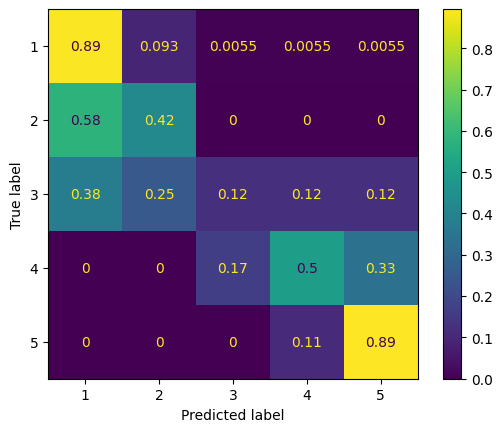

In [43]:
random_few_shot_labels, random_few_shot_predictions, random_few_shot_cm, random_few_shot_cr = await predict_and_evaluate(random_few_shot_predict)
print(random_few_shot_cr)

# Demo: Embeddings and vector stores

In the previous demonstration, we saw that providing several randomly-selected examples to the LLM at inference time does decently well - it's decently good at predicting the review score, especially within 1 point of the actual review.
In a little bit, we'll see that providing better examples to the model at inference time helps improve these scores.
But we need efficient ways of searching over our `train` examples to determine which one to use.

This is when you want to use a vector store.
Vector stores can be in-memory stors, on-disk stores, database extensions like pgvector for Postgres, or even external APIs like Pinecone.

Today, we'll use a popular open-source vectore database called `chromadb`.
This tool allows us to ingest our documents and search over them effectively to determine which examples to use.

In this demo, we'll go over the basics of how to use ChromaDB.
We will also use `sentence-transformers` for embeddings as an example of how to use open-weights embedding models.

In [44]:
# Install chromadb and sentence-transformers
!pip install -qqqq chromadb sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 11.7 MB/s eta 0:

In [45]:
# Imports
from sentence_transformers import SentenceTransformer
from chromadb import Client
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In this cell, we declare our embedding function.
We will use the small but powerful [BGE-small](https://huggingface.co/BAAI/bge-small-en-v1.5) model to embed our documents.

In [46]:
embed_fn = SentenceTransformerEmbeddingFunction('BAAI/bge-small-en-v1.5')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Next, we can create our `chromadb` client and use it to create our collection (think table).
Notice that we pass our embedding function.
That way, when we add documents to the table, the the text is automatically embedded.

In [47]:
client = Client()

In [48]:
reviews = client.create_collection(
    name='uber-reviews',
    embedding_function=embed_fn,
    get_or_create=True
)

In [49]:
reviews.add(documents=train['text'], metadatas=[{'rating': x} for x in train['label']], ids=[str(x) for x in range(len(train))])

Once we have created our vector store, we can search over it using plain text.
Here are 3 queries - good review, a neutral review, and a bad review.
Let's search our train documents and observe the average rating for the closest 5 documents to each fake review.

In [50]:
queries = [
    "This is the best uber ride of my life!",
    "This uber ride was pretty typical - not good or bad.",
    "This uber ride was awful",
]

In [51]:
retrievals = reviews.query(
    query_texts=queries,
    n_results=5
)

In [52]:
for query, metadatas in zip(queries, retrievals['metadatas']):
    ratings = [float(i.get('rating')) for i in metadatas]
    print(f"Review {query}")
    print(f"Avg rating of retrieved passages: {np.mean(ratings)}")

Review This is the best uber ride of my life!

Avg rating of retrieved passages: 5.0

Review This uber ride was pretty typical - not good or bad.

Avg rating of retrieved passages: 2.0

Review This uber ride was awful

Avg rating of retrieved passages: 1.0

In [57]:
reviews.query(query_texts = 'hello!')['documents']

[['App was great. Driver responded immediately and came on time. Early am. Respected my need to wake up. Quiet ride and easy arrival at airport.',
  'I left my holiday present in the Uber ride and Elaine brought to back to me. Hooray for Uber and Elaine!!!',
  'I just wanted to write and let all of you at Uber that I had the most amazing driver the other day! As soon as I got in the car, he handed me a bowl of delicious treats, I thought that was so sweet! Then he handed me a bottle of water.  This may not be a big deal to some, however, it actually made my day! He was so polite, helpful, generous and all around awesome!!! Please please let this driver, Jasur Nazarou # 5756433 know that he is awesome!! He deserves some sort of praise from all of you at Uber! All of your drivers should take notes from this guy! All of your drivers need to be like him!!! WONDEEFUL EXPERIENCE!!!!Stephanie Angelini  @Angelinistephanie.  *****@yahoo.com.',
  'My daughter used uber for the first time today. 

## Discussion: Using vector stores

Now that we have our data encoded this way, can anyone tell me how we might use this object to improve the way we classify reviews?

# Prompt engineering 2: dynamic few-shot prompting

In [60]:
def dynamic_few_shot_examples_fn(**kwargs):
    retrievals = reviews.query(
        query_texts=[kwargs['review']],
        n_results=5
    )
    result_strs = []
    documents = retrievals['documents'][0]
    metadatas = retrievals['metadatas'][0]
    for document, metadata in zip(documents, metadatas):
        result_strs.append(f"Text: {document}\nRating: {metadata.get('rating')}")
    return "\n\n".join(result_strs)

In [61]:
print(dynamic_few_shot_examples_fn(review="This is the best uber ride of my life!"))

Text: Uber is like a dream come true! yes nice and comfortable ride which picks you right from your house no need 
to go to the main road to catch a taxi! thumbs up to uber !
Rating: 5

Text: Uber rides have always been convenient, plentiful and prompt. All rides have been with good and friendly 
drivers. Always been impressed with the cleanliness and newness of the vehicles I've ridden in.
Rating: 5

Text: I have only had one ride experience I wish not to repeat - I love the ease of getting a ride and the 
efficiency of the drivers. The costs are always reasonable as well. I will definitely use Uber in my future.
Rating: 5

Text: I've been using Uber for a good 3 years now.  Going to and from the airport, events and other places I want 
to go but don't want to hassle with finding parking or walking through acres of parking lot after I've arrived.  
Love the convenience of being picked up and dropped of right at the front door and I've had such nice experiences 
with meeting the most kind and positive Uber drivers. I've been around for a long time and am glad there is a 
service like this now. Sometimes I am afraid to go here or there because I'm concerned I'll get lost but with Uber 
I no longer worry and just go! One more thing.... ** If you want to sign up with coupon code jodir282ue you can get
up to $20 off your first ride. **
Rating: 5

Text: I have used Uber many times, and each time I have been exceedingly pleased. The drivers were prompt, 
courteous, and professional. I highly recommend Uber.
Rating: 5

In [62]:
dynamic_few_shot_prompt_tmpl_str = """\
The review text is below.
---------------------
{review}
---------------------
Given the context information and not prior knowledge, \
please attempt to predict the review score of the context.
Here are several examples of reviews and their ratings:

{dynamic_few_shot_examples}

Query: What is the rating of this review?
Answer: \
"""

dynamic_few_shot_prompt_tmpl = PromptTemplate(
    few_shot_prompt_tmpl_str,
    function_mappings={"dynamic_few_shot_examples": dynamic_few_shot_examples_fn},
)

In [65]:
async def dynamic_few_shot_predict(text):
    messages = [
        ChatMessage.from_str(few_shot_prompt_tmpl.format(review=text))
    ]
    response = await zero_shot_structured_llm.achat(messages)
    return response.raw.rating

precision    recall  f1-score   support

           1       0.91      0.93      0.92       182
           2       0.37      0.37      0.37        19
           3       0.00      0.00      0.00         8
           4       0.57      0.67      0.62         6
           5       0.86      0.95      0.90        19

    accuracy                           0.85       234
   macro avg       0.54      0.58      0.56       234
weighted avg       0.82      0.85      0.84       234

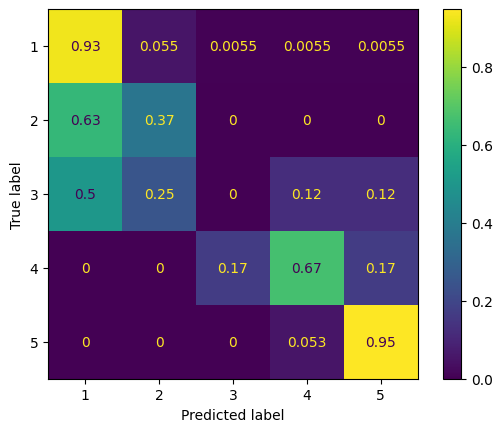

In [67]:
dynamic_few_shot_labels, dynamic_few_shot_predictions, dynamic_few_shot_cm, dynamic_few_shot_cr = await predict_and_evaluate(dynamic_few_shot_predict)
print(dynamic_few_shot_cr)